# tutorial example not actually used

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist


In [51]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [52]:
# Create dataset from stored images


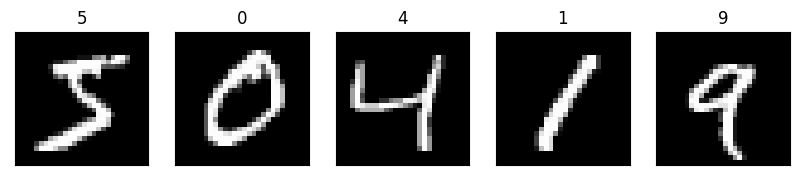

In [53]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [54]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

In [55]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [56]:
# Create simple Neural Network model
# model = Sequential()
# model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(10, activation='softmax'))
# model.summary()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [58]:
# Train the Neural Network model
model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4225 - acc: 0.5789 - val_loss: 0.9909 - val_acc: 0.6897
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8435 - acc: 0.7372 - val_loss: 0.7325 - val_acc: 0.7727
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7257 - acc: 0.7792 - val_loss: 0.6919 - val_acc: 0.8029
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6536 - acc: 0.8156 - val_loss: 0.6040 - val_acc: 0.8309
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6082 - acc: 0.8278 - val_loss: 0.6037 - val_acc: 0.8358
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5698 - acc: 0.8433 - val_loss: 0.5476 - val_acc: 0.8452
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5499 - acc: 0.8497 - val_loss: 0.5174 - val_acc: 0.8650
Epoch 8/30
1875/1875 [==============================] - 2s 1ms

In [59]:
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 785us/step


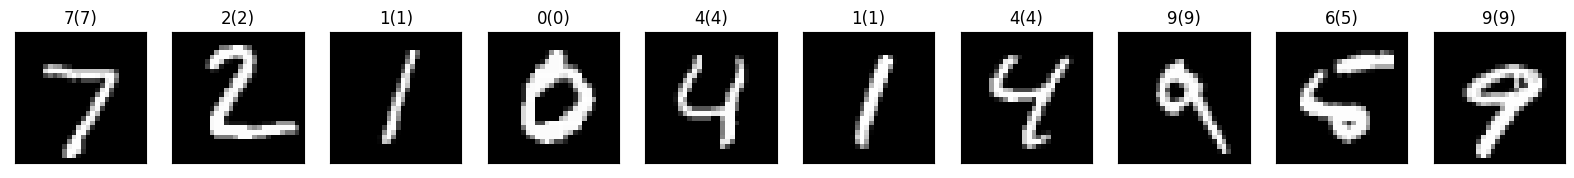

In [60]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(str(predictions[i]) + "(" + str(y_test[i].argmax(axis=0)) + ")")
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()